In [1]:
import pandas as pd

pre_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/pre_cleaned_data2.csv")
pandemic_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/pandemic_data2.csv")
post_data = pd.read_csv("/Users/ramyaviswanath/Desktop/untitled folder/post_cleaned_data2.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_pre = pre_data.drop(['AVAILABLE BIKES'], axis=1)
y_pre = pre_data['AVAILABLE BIKES']

X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.2, random_state=42)

# Training the Lasso model
lasso_model_pre = Lasso(alpha=0.5) 
lasso_model_pre.fit(X_train, y_train)
y_pre_prediction = lasso_model_pre.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pre_prediction))
mse = mean_squared_error(y_test, y_pre_prediction)
r2 = r2_score(y_test, y_pre_prediction)

print('Pre-Pandemic Test RMSE:', rmse_test)
print("MSE :", mse)
print("R2 :", r2)


Pre-Pandemic Test RMSE: 2.7980610196436495
MSE : 7.82914546964926
R2 : 0.9353521246972497


In [3]:
#Applying the model to post pandemic data
X_po_pandemic = post_data.drop(['AVAILABLE BIKES'], axis=1)
y_po_pandemic = post_data['AVAILABLE BIKES']
post_pre_prediction = lasso_model_pre.predict(X_po_pandemic)

#Comparing predictions with actual pandemic data
rmse_pandemic = np.sqrt(mean_squared_error(y_po_pandemic,post_pre_prediction))
mse_pp = mean_squared_error(y_po_pandemic, post_pre_prediction)
r2_pp = r2_score(y_po_pandemic,post_pre_prediction)

print('Post Pandemic RMSE:', rmse_pandemic)
print("MSE :",mse_pp)
print("R2 :",r2_pp)

Post Pandemic RMSE: 2.429229646639007
MSE : 5.901156676109875
R2 : 0.9374961202524543


In [4]:
#Training model with pandemic data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X19 = pandemic_data.drop(['AVAILABLE BIKES'], axis=1)
y19 = pandemic_data['AVAILABLE BIKES']

X_train, X_test, y_train, y_test = train_test_split(X19, y19, test_size=0.2, random_state=42)

lasso_model_pandemic = Lasso(alpha=0.5) 
lasso_model_pandemic.fit(X_train, y_train)

# Evaluating the Lasso model
y_pand_prediction = lasso_model_pandemic.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pand_prediction))
mse = mean_squared_error(y_test, y_pand_prediction)
r2 = r2_score(y_test, y_pand_prediction)

print('Pandemic Test RMSE:', rmse_test)
print("MSE :", mse)
print("R2 :", r2)



Pandemic Test RMSE: 0.9337145669438188
MSE : 0.8718228925230832
R2 : 0.9866958502546481


In [5]:
#Applying the model to post pandemic data
X_po_pandemic = post_data.drop(['AVAILABLE BIKES'], axis=1)
y_po_pandemic = post_data['AVAILABLE BIKES']

post_pand_prediction = lasso_model_pandemic.predict(X_po_pandemic)

rmse_pandemic = np.sqrt(mean_squared_error(y_po_pandemic,post_pand_prediction))
mse_pp = mean_squared_error(y_po_pandemic, post_pand_prediction)
r2_pp = r2_score(y_po_pandemic,post_pand_prediction)

print('Post Pandemic RMSE:', rmse_pandemic)
print("MSE :",mse_pp)
print("R2 :",r2_pp)

Post Pandemic RMSE: 2.437532041240899
MSE : 5.941562452076024
R2 : 0.9370681502966117


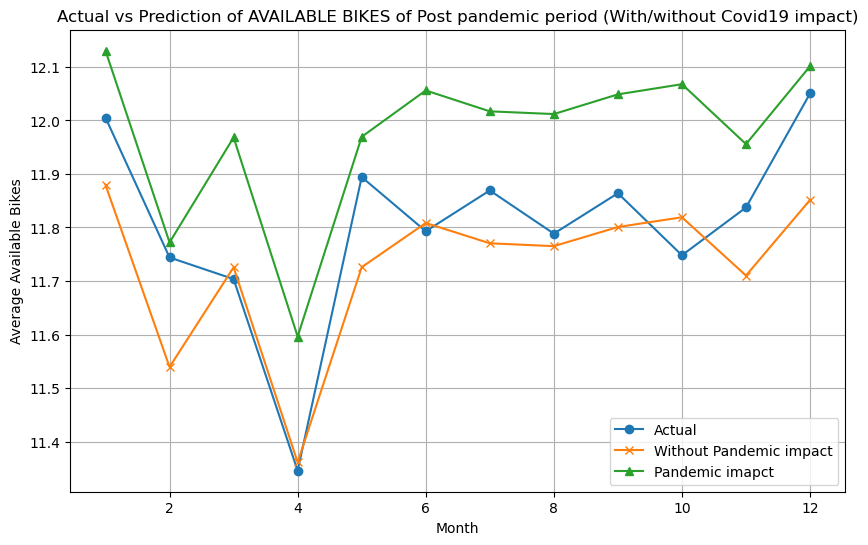

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

post_data['Pre_Pandemic_Prediction'] = post_pre_prediction
post_data['Pandemic_Prediction'] = post_pand_prediction
monthly_data = post_data.groupby('MONTH').mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_data.index, monthly_data['AVAILABLE BIKES'], label='Actual', marker='o')
plt.plot(monthly_data.index, monthly_data['Pre_Pandemic_Prediction'], label='Without Pandemic impact', marker='x')
plt.plot(monthly_data.index, monthly_data['Pandemic_Prediction'], label='Pandemic imapct', marker='^')

plt.title('Actual vs Prediction of AVAILABLE BIKES of Post pandemic period (With/without Covid19 impact)')
plt.xlabel('Month')
plt.ylabel('Average Available Bikes')
plt.legend()
plt.grid(True)
plt.show()
